<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [3]:
#hh_df = pd.read_csv('https://drive.google.com/file/d/1Kb78mAWYKcYlellTGhIjPI-bCcKbGuTn/view?usp=sharing', sep=';')
hh_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dst-3.0_16_1_hh_database.csv', sep=';')
display(hh_df.shape)

(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [4]:
display(hh_df.head(3))

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [5]:
display(hh_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

5. Выведите основную статистическую информацию о столбцах.


In [6]:
display(f'Количество уникальных записей признака "Опыт Работы" - {hh_df["Опыт работы"].nunique()}')
display(f'Наиболее попклярная искомая должность - {hh_df["Ищет работу на должность:"].value_counts().head(1).index[0]}')

'Количество уникальных записей признака "Опыт Работы" - 44413'

'Наиболее попклярная искомая должность - Системный администратор'

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [7]:
hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(
    lambda x: x.split()[0].lower() if x.split()[1]=='образование'
    else (x.split()[0]+' '+x.split()[1]).lower()
)
hh_df.drop(columns='Образование и ВУЗ', axis=1, inplace=True)
print(f'Среднее образование имеет {hh_df["Образование"].value_counts()["среднее"]} соискателей')

Среднее образование имеет 559 соискателей


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [8]:
hh_df['Пол'] = hh_df['Пол, возраст'].apply(lambda x: x.split()[0][0])
hh_df['Возраст'] = hh_df['Пол, возраст'].apply(lambda x:int(x.split()[2]))
print(f'Доля женских резюме - {round(hh_df["Пол"].value_counts(normalize=True)["Ж"]*100, 2)}%')
print(f'Средний возраст соискателей - {round(hh_df["Возраст"].mean(), 1)} лет')
hh_df.drop(columns='Пол, возраст', axis=1, inplace=True)

Доля женских резюме - 19.07%
Средний возраст соискателей - 32.2 лет


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [9]:
def experience(_string):
  # проверим сразу пропуски в т.ч. скрытые
  if _string is np.NaN or _string=='Не указано':
    return np.NaN
  # если не пропуск, то далее разобьем строку
  _list = _string.split()
  # проверим, не является ли первое же число месяцем
  if _list[3][:5]=='месяц':
    return int(_list[2])
  # проверим, есть ли количество месяцев после года
  elif _list[5][:5]!='месяц':
    return int(_list[2])*12
  else:
    return int(_list[2])*12 + int(_list[4])

hh_df['Опыт работы в месяцах'] = hh_df['Опыт работы'].apply(experience)
hh_df.drop(columns='Опыт работы', axis=1, inplace=True)
print(f'Медианный опыт работы - {hh_df["Опыт работы в месяцах"].median()} месяцев')

Медианный опыт работы - 100.0 месяцев


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [10]:
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань',
                  'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа',
                  'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]


""" ЭТОТ ФРАГМЕНТ ИСПОЛЬЗОВАЛСЯ ДЛЯ ПРОВЕРКИ ЦЕЛЕСООБРАЗНОСТИ ИСПОЛЬЗОВАНИЯ ШАБЛОНА "готов(а)\не готов(а)"
  display(hh_df_test[['Город, переезд, командировки', 'Готовность к переезду', 'Готовность к командировкам']].tail(10))
  def get_test_reloc(_string):
    _index = 1
    if _string.split(sep=' , ')[1][:3] == 'м. ' or _string.split(sep=' , ')[1][:3] == ' м.':
      _index = 2
    return _string.split(sep=' , ')[_index]

  _test_df = hh_df_test.copy()
  _test_df['test_reloc'] = _test_df['Город, переезд, командировки'].apply(get_test_reloc)
  print(_test_df['test_reloc'].value_counts())
"""

def get_city(_string):
  if _string.split(sep=' , ')[0]=='Москва'\
   or _string.split(sep=' , ')[0]=='Санкт-Петербург':
    return _string.split(sep=' , ')[0]
  elif _string.split(sep=' , ')[0] in million_cities:
    return 'город-миллионник'
  else:
    return 'другие'

def get_relocation(_string):
  # присвоим индекс 1, предполагая, что станция метро не указана
  _index = 1
  # проверим это, если указана, то берем следующий индекс
  if _string.split(sep=' , ')[1][:3] == 'м. ' or _string.split(sep=' , ')[1][:3] == ' м.':
    _index = 2
  # готовность определяем не по шаблону, а по признаку "не", т.к. проверка показала,
  # что готовность может выражаться иными выражениями, например "хочу"
  if _string.split(sep=' , ')[_index][:2]=='не':
    return False
  else:
    return True

def get_trip(_string):
  # поступаем аналогично функции get_relocation
  _index = 2
  if _string.split(sep=' , ')[1][:3] == 'м. ' or _string.split(sep=' , ')[1][:3] == ' м.':
    _index = 3
  if len(_string.split(sep=' , '))==_index:
    return False
  elif _string.split(sep=' , ')[_index][:2]=='не':
    return False
  else:
    return True

hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(get_city)
hh_df['Готовность к переезду'] = hh_df['Город, переезд, командировки'].apply(get_relocation)
hh_df['Готовность к командировкам'] = hh_df['Город, переезд, командировки'].apply(get_trip)

print(f'В Санкт-Петербурге проживает\
    {round(hh_df["Город"].value_counts(normalize=True)["Санкт-Петербург"]*100)}\
    % соискателей'
)

mask = (hh_df['Готовность к переезду']==True) & (hh_df['Готовность к командировкам']==True)
print(f'К переезду и командировкам готовы\
    {round(hh_df[mask].shape[0]/hh_df.shape[0] * 100)}\
    % соискателей'
)

hh_df.drop(columns='Город, переезд, командировки', axis=1, inplace=True)

В Санкт-Петербурге проживает    11    % соискателей
К переезду и командировкам готовы    32    % соискателей


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [11]:
# создаем признаки-мигалки
list_employ = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
for each in list_employ:
  hh_df[each] = hh_df['Занятость'].apply(
      lambda x: True if each in x.split(sep=', ') else False
  )
list_schedule = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']
for each in list_schedule:
  hh_df[each] = hh_df['График'].apply(
      lambda x: True if each in x.split(sep=', ') else False
  )

mask = (hh_df['волонтерство']==True) & (hh_df['проектная работа']==True)
print(f'Ищут волонтерство или проектную работу\
    {hh_df[mask].shape[0]}\
    соискателей'
)

mask = (hh_df['гибкий график']==True) & (hh_df['вахтовый метод']==True)
print(f'Согласны на гибкий график или вахтовый метод\
    {hh_df[mask].shape[0]}\
    соискателей'
)

hh_df.drop(columns=['Занятость', 'График'], axis=1, inplace=True)

Ищут волонтерство или проектную работу    436    соискателей
Согласны на гибкий график или вахтовый метод    2311    соискателей


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [12]:
currency_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ExchangeRates.csv')
# создадим новый признак даты в основном DF, приведем к единому формату
currency_df['date'] = pd.to_datetime(currency_df['date'], dayfirst=True).dt.date
hh_df['date'] = pd.to_datetime(hh_df['Обновление резюме'], dayfirst=True).dt.date

In [13]:
def get_zp_curr(_string):
  _curr = _string.split(sep=' ')[1]
  if _curr[:3] == 'грн':
    return 'UAH'
  elif _curr[:3] == 'бел':
    return 'BYN'
  elif _curr[:3] == 'руб':
    return 'RUR'
  elif _curr[:3] == 'сум':
    return 'UZS'
  else:
    return _curr

# создаем дополнительные признаки для последуюшего объединения DF
hh_df['zp_sum'] = hh_df['ЗП'].apply(lambda x: int(x.split(sep=' ')[0]))
hh_df['currency'] = hh_df['ЗП'].apply(get_zp_curr)
# объединим данные
hh_df = hh_df.merge(
    currency_df,
    on=['date', 'currency'],
    how='left'
)
# заполним пустые значения (для RUR)
values = {
    'close': 1,
    'proportion': 1
}
hh_df = hh_df.fillna(value= values)
# приведем ЗП к единой валюте
hh_df['ЗП (руб)'] = hh_df['zp_sum']*hh_df['close']/hh_df['proportion']

print(f'Желаемая медианная ЗП соискателей - {round(hh_df["ЗП (руб)"].median()/1000)} тыс.руб.')
# очистим DF от лишних данных (удалим более не нужные столбцы)
hh_df.drop(columns=['ЗП',
                         'Обновление резюме',
                         'zp_sum',
                         'currency',
                         'per',
                         'time',
                         'close',
                         'vol',
                         'proportion'
                         ], 
                axis=1, 
                inplace=True)

Желаемая медианная ЗП соискателей - 59 тыс.руб.


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

'Мода признака "Возраст" равна - 30 лет'

'Предельные значения: минимальный - 14    , максимальный - 100'

'Основная часть соискателей находится в границах     от 27.0 лет     до 36.0 лет'

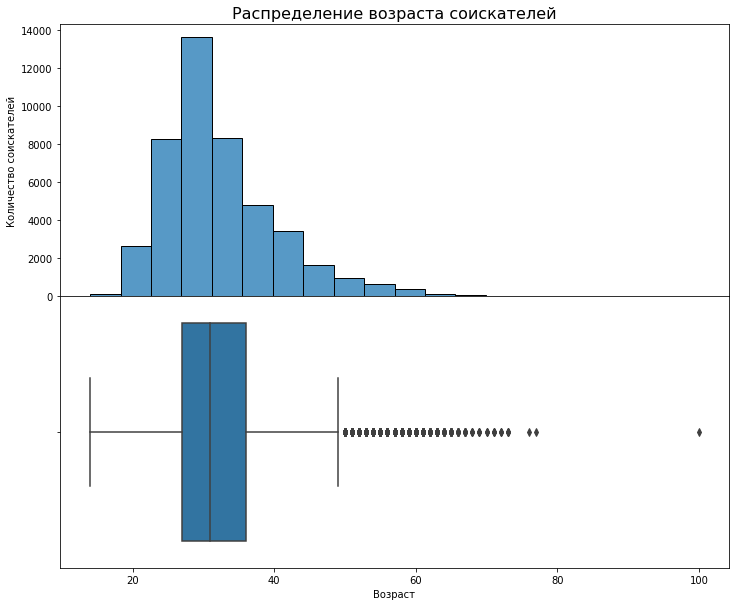

In [14]:
# создаем заготовку для визуализации
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.subplots_adjust(hspace=.0)
# строим гистограмму
histplot = sns.histplot(
    data=hh_df, 
    x='Возраст', 
    bins=20,
    ax=axes[0],
)
histplot.set_title('Распределение возраста соискателей', fontsize=16)
histplot.set_xlabel('Возраст (лет)')
histplot.set_ylabel('Количество соискателей')
# строим боксплот
boxplot = sns.boxplot(
    data=hh_df,
    x='Возраст',
    ax=axes[1]
)
boxplot.set_xlabel('Возраст');
# выводим рассчеты по заданию
display(f'Мода признака "Возраст" равна - {hh_df["Возраст"].mode()[0]} лет')
display(
    f'Предельные значения: минимальный - {hh_df["Возраст"].min()}\
    , максимальный - {hh_df["Возраст"].max()}'
)
display(
    f'Основная часть соискателей находится в границах \
    от {hh_df["Возраст"].quantile(.25)} лет \
    до {hh_df["Возраст"].quantile(.75)} лет'
)

Возраст соискателей имеет нормальное распределение. Следует обратить внимание на аномалии (минимальный возраст 14 лет, максимальный - 100), также стоит отметить достаточное количество выбросов справа (начиная от 50 лет). Это следует учесть при очистке данных.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

'Мода признака "Опыт" равна - 81.0 месяцев'

'Предельные значения: минимальный - 1.0    , максимальный - 1188.0'

'Основная часть имеет опыт в границах     от 57.0 месяцев     до 154.0 месяцев'

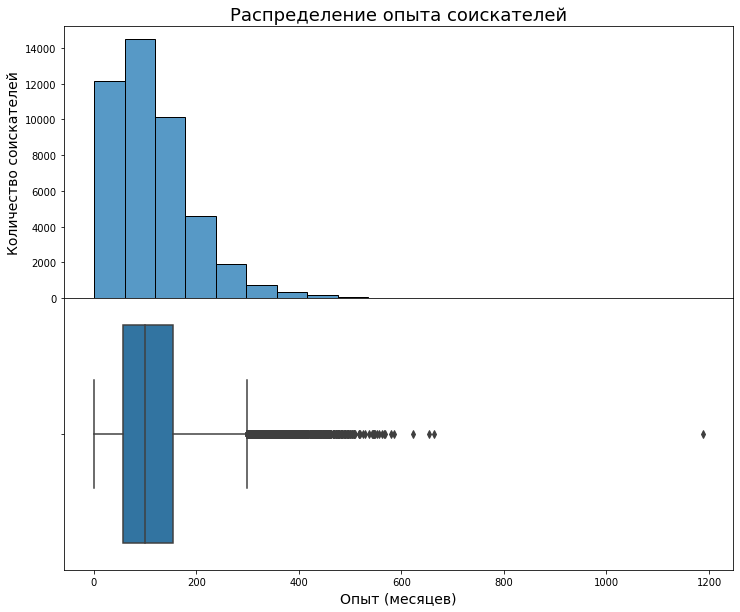

In [15]:
# создаем заготовку для визуализации
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.subplots_adjust(hspace=.0)
# строим гистограмму
histplot = sns.histplot(
    data=hh_df, 
    x='Опыт работы в месяцах', 
    bins=20,
    ax=axes[0]
)
histplot.set_title('Распределение опыта соискателей', fontsize=18)
histplot.set_ylabel('Количество соискателей', fontsize=14)
# строим боксплот
boxplot = sns.boxplot(
    data=hh_df,
    x='Опыт работы в месяцах',
    ax=axes[1]
)
boxplot.set_xlabel('Опыт (месяцев)', fontsize=14);
# выводим рассчеты по заданию
display(f'Мода признака "Опыт" равна - {hh_df["Опыт работы в месяцах"].mode()[0]} месяцев')
display(
    f'Предельные значения: минимальный - {hh_df["Опыт работы в месяцах"].min()}\
    , максимальный - {hh_df["Опыт работы в месяцах"].max()}'
)
display(
    f'Основная часть имеет опыт в границах \
    от {hh_df["Опыт работы в месяцах"].quantile(.25)} месяцев \
    до {hh_df["Опыт работы в месяцах"].quantile(.75)} месяцев'
);

Опыт соискателей имеет логнормальное распределение. Как и в предыдущем исследуемом признаке следует обратить внимание на аномалии - максимальный опыт почти 100 лет, опять же стоит отметить значительное количество выбросов справа. Это также следует учесть при очистке данных.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [16]:
# НАДО ЧТО-ТО СДЕЛАТЬ, КАК-ТО ОБЪЕДИНИТЬ
#fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))
#plt.subplots_adjust(hspace=.0)

fig_1 = px.histogram(
    data_frame=hh_df, 
    x='ЗП (руб)', 
    nbins=200,
    height=400,
    width=800,
    title='Распределение соискателей по желаемой ЗП'
)
fig_1.show();

fig_2 = px.box(
    data_frame=hh_df,
    height=300,
    width=800,
    x='ЗП (руб)'
)
fig_2.show();

display(
    f'Предельные значения признака ЗП: минимальная - {hh_df["ЗП (руб)"].min()}\
    , максимальная - {hh_df["ЗП (руб)"].max()}'
)
display(
    f'Основная часть соискателей ожидает ЗП в границах \
    от {hh_df["ЗП (руб)"].quantile(.25)} рублей \
    до {hh_df["ЗП (руб)"].quantile(.75)} рублей'
);

'Предельные значения признака ЗП: минимальная - 1.0    , максимальная - 24304876.0'

'Основная часть соискателей ожидает ЗП в границах     от 37082.2 рублей     до 95000.0 рублей'

Ожидаемая зарплата имеет на первый взгляд логнормальное распределение, однако утверждать сложно, поскольку визуализация сильно искажена аномалиями (максимальная искомая ЗП - почти 25 млн.руб.) и выбросами. Судя по тому, что медианная ЗП составляет 59К и основная часть искомой ЗП лежит в границах 37-95К, можно предположить, что очистив данные, мы все же увидим нормальное распределение.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [17]:
# отфильтруем по условию DF
hh_df_before1M = hh_df[hh_df['ЗП (руб)']<1000000]
# группируем по признаку "Образование", находим медиану
bar_data = hh_df_before1M.groupby(
    by='Образование',
    as_index=False
)[['ЗП (руб)']].median()
# строим диаграмму
fig = px.bar(
    data_frame=bar_data,
    x="Образование",
    y="ЗП (руб)",
    color='Образование',
    text = 'ЗП (руб)',
    orientation='v', #ориентация графика
    height=500,
    width=800,
    title='Желаемая медианная ЗП соискателей от уровня образования'
)
fig.show();

display(
    f'По медианному показателю более высокую ЗП ожидают соискатели категории - \
    {bar_data["Образование"].value_counts().head(1).index[0]}'
)

'По медианному показателю более высокую ЗП ожидают соискатели категории -     высшее'

Наибольшую ЗП ожидают соискатели с высшим образованием, даже с неоконченным высшим также видно ожидание большей ЗП, чем со средним и средним специальным.
Высшее образование МОЖЕТ говорить о значительно более высокой квалификации, однако стоит учитывать, что это может быть высшее образование не по искомой профессии. В любом случае, высшее образование, это как минимум дополнительный хардскил, как максимум прокачанный скил по профессии - учитывать можно (возможно в виде некоего повышающего коэффициента).

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [18]:
fig = px.box(
    data_frame=hh_df_before1M, 
    y='Город',
    x='ЗП (руб)',
    color='Город',
    height=500,
    width=1100,
    title='Желаемая медианная ЗП соискателей по городам'
)

fig.show();

Output hidden; open in https://colab.research.google.com to view.

На графике четко видны повышенные уровни желаемых ЗП в Москве и СПб, причем можно отметить, что мединная желаемая ЗП соискателей из Москвы находится на границе (3ий квантиль) искомой ЗП в СПб. Точно также, медианная ЗП соискателей из СПб находится на границе искомой ЗП в остальных городах (можно отметить, что желания по ЗП в городах-миллионниках и других городах практически совпадают). Стоит отдельно отметить, что вилка ЗП (q1-q3) соискателей из Москвы начинается там, где в остальных городах (кроме СПб) заканчивается.
Для потенциальных работодателей для поиска работников в офис (на физическое рабочее место) это сущщественный показатель, который важен. Возможно его влияние можно снизить при построении модели за счет признака "Готовность к переезду" (пока не совсем понимаю, как это работает, но думаю что можно как-то увязать признак ЗП с признаком город+готовность к переезду).

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

Медианная ЗП готовых и к переезду, и к командировкам - 66 тыс.руб


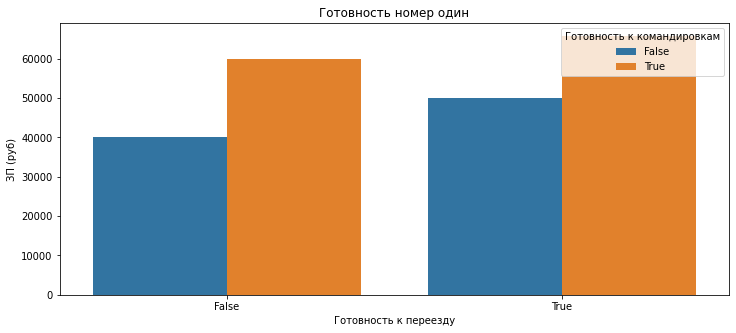

In [19]:
# подготовим данные - сгруппируем по признакам
bar_data = hh_df.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()
# строим график
fig = plt.figure(figsize=(12, 5))
barplot = sns.barplot(
    data=bar_data,
    x='Готовность к переезду',
    y='ЗП (руб)',
    hue='Готовность к командировкам'
)
barplot.set_title('Готовность номер один')
fig.show()

answer = bar_data[(bar_data['Готовность к переезду']) & (bar_data['Готовность к командировкам'])]['ЗП (руб)']
print(f'Медианная ЗП готовых и к переезду, и к командировкам - {round(int(answer.values)/1000)} тыс.руб')

В целом соискатели готовые к переезду ожидают ЗП выше (они хотят дороже продать себя), точно также как и те, кто готов к командировкам. Вкупе, оба признака увеличивают ожидания по ЗП примерно на 26 тыс.руб (с 40 до 66), а именно: 10 тыс - влияние признака готовности к переезду, и 16 тыс - готовность к командировкам.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

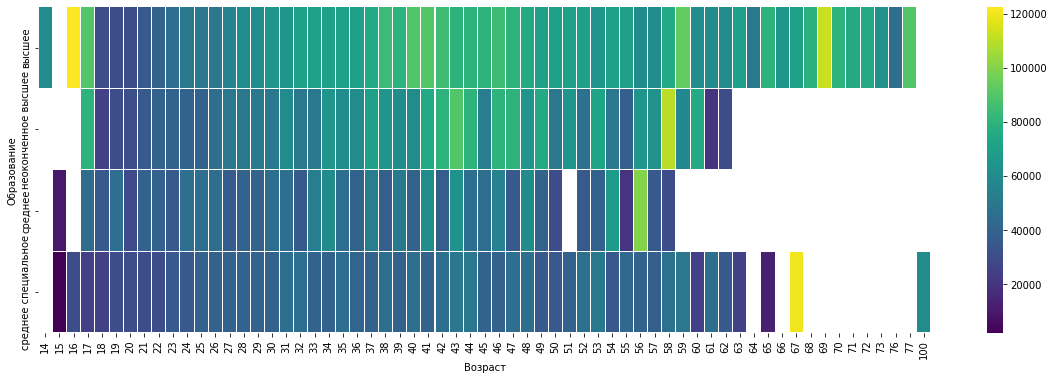

In [20]:
hh_pivot = hh_df.pivot_table(
    columns='Возраст',
    index='Образование',
    values='ЗП (руб)',
    aggfunc='median'
)

fig = plt.subplots(figsize=(20, 6))
heatmap = sns.heatmap(
    hh_pivot,
    linewidth=.05,
    linecolor='w',
    cmap='viridis'
);

Нельзя сказать, что возраст в группах образования "среднее" и "среднее специальное" имеет значительное влияние на уровень желаемой ЗП - незначительно растет до 45. В группах "неоконченое высшее" и "высшее" картина несколько иная, можно сказать, что рост желаемой ЗП продолжается так же до 45 лет, однако интенсивность значительно выше. 
На пике, желаемая ЗП у категорий "высшее" и "неоконченное высшее" примерно одинакова, однако ее интенсивный рост начинается раньше и уровень достаточно стабильно держится с небольшим снижением после 45-50 лет.
Есть некий всплеск в категории "высшее" с 65 до 70 лет.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

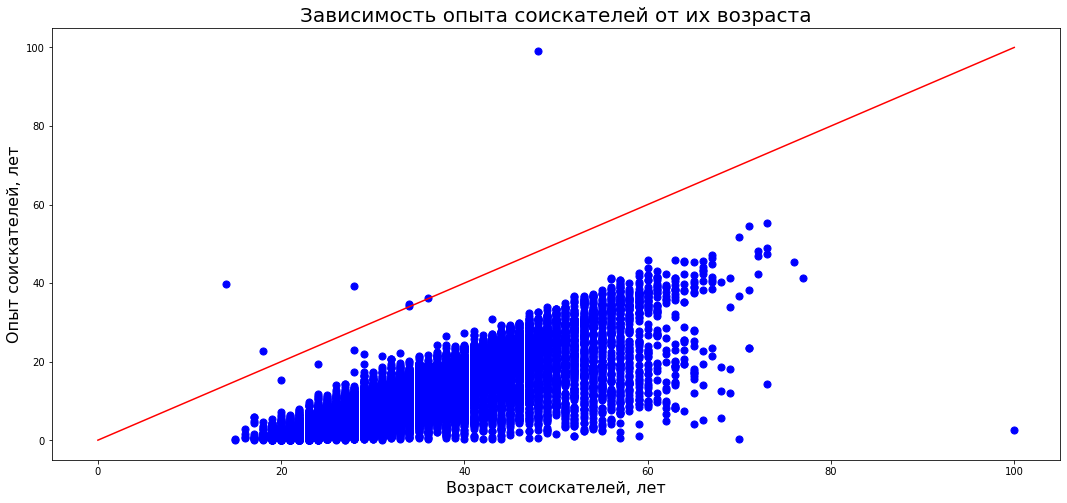

In [21]:
fig = plt.figure(figsize=(14, 6))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=hh_df['Возраст'], 
    y=hh_df['Опыт работы в месяцах']/12, 
    s=50,
    marker='o',
    c='blue'
)
axes.plot(
    [0, 100],
    [0,100],
    c='red'
)
axes.set_title("Зависимость опыта соискателей от их возраста", fontsize=20)
axes.set_xlabel('Возраст соискателей, лет', fontsize=16)
axes.set_ylabel('Опыт соискателей, лет', fontsize=16)

fig.show()

По распределению соотношения можно сделать вывод, что основная часть соискателей имеет опыт в границах от 0 до (Возраст - 20 лет), что соответствует логике. Бросаются в глаза явные выбросы, часть из которых (семь) мы отсеяли с помощью графика, указывающего на равенство возраста и опыта. Также можно обратить внимание на точки с явными перекосами, т.е. вероятной недостоверностью данных, а именно: точка указывающая на соискателя с практически нулевым опытом и возрастом 100лет; точки, выбивающиеся из общего распределения и находящиеся в зоне допустимости (ниже красной линии), но явно указывающие на недостоверность (слишком близко к границе) - соискатели начали карьеру в возрасте до 10 лет.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


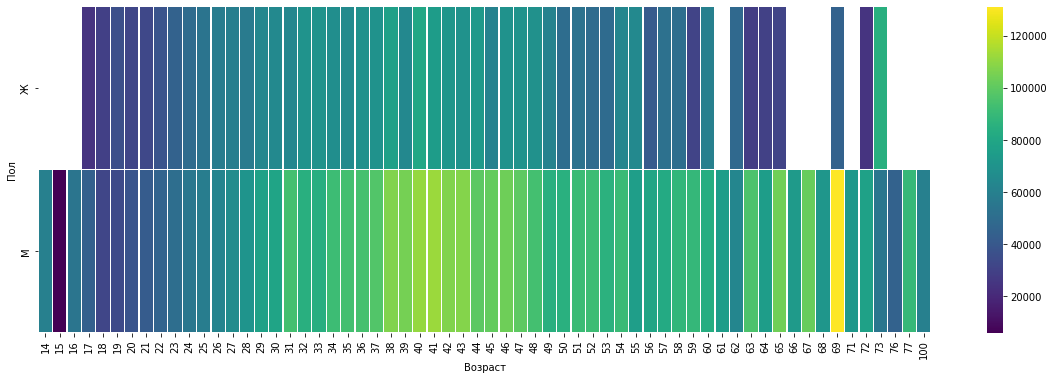

In [22]:
# исключим 3 записи с возрастом 70 для наглядности
hh_pivot = hh_df[hh_df['Возраст']!=70].pivot_table(
    columns='Возраст',
    index='Пол',
    values='ЗП (руб)',
    aggfunc='mean'
)

fig = plt.subplots(figsize=(20, 6))
heatmap = sns.heatmap(
    hh_pivot,
    linewidth=.05,
    linecolor='w',
    cmap='viridis'
);

#display(hh_df[hh_df['Возраст']==70].head())

Распределение желаемой ЗП (средней) по гендерному признаку указывает на более интенсивный и существенный рост амбиций мужчин, начиная с 25 до 45 лет. Далее у обоих гендеров наблюдается спад, однако уровень желаемой ЗП у мужчин сохраняется на высоком уровне вплоть до границ шкалы.

In [31]:
fig = px.box(
    data_frame=hh_df_before1M, 
    y='полная занятость',
    x='ЗП (руб)',
    color='полная занятость',
    height=500,
    width=1100,
    title='Желаемая медианная ЗП соискателей с учетом полной занятости'
)

fig.show();

Существенное влияние на уровень желаемой ЗП оказывает готовность/желание трудоустройства на полную ставку - все показатели (медианная ЗП, квантили и т.д.) растут ровно в 2 раза

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [24]:
duplicates = hh_df.duplicated()
print(f'Количество полных дубликатов - {hh_df[duplicates].shape[0]}')
hh_df_clean = hh_df.drop_duplicates()

Количество полных дубликатов - 161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [25]:
#hh_df_clean.info()
answer = hh_df_clean[hh_df_clean['Опыт работы в месяцах'].isna()].shape[0]
print(f'Количество пропусков признака "Опыт работы в месяцах" - {answer}')

Количество пропусков признака "Опыт работы в месяцах" - 168


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [26]:
# для начала заполним пропуски Опыт работы
values = {'Опыт работы в месяцах': hh_df_clean['Опыт работы в месяцах'].median()}
hh_df_clean = hh_df_clean.fillna(values)
# удалим оставшиеся пропуски
hh_df_clean = hh_df_clean.dropna(how='any', axis=0)
# выведем ответ по заданию
answer = round(hh_df_clean['Опыт работы в месяцах'].mean())
display(f'Средний опыт соискателей после очистки -{answer}месяцев')

'Средний опыт соискателей после очистки -114месяцев'

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [27]:
# зададим маску по условию
mask = (hh_df_clean['ЗП (руб)']>1000000) | (hh_df_clean['ЗП (руб)']<1000)
# выведем ответ по заданию
answer = hh_df_clean[mask].shape[0]
display(f'Количество резюме по условию задачи (1000>x>1000000) -{answer}')
# удалим записи по маске
hh_df_clean = hh_df_clean[~mask]

'Количество резюме по условию задачи (1000>x>1000000) -89'

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [28]:
# аналогично п.4
mask = (hh_df_clean['Опыт работы в месяцах'] > (hh_df_clean['Возраст']*12))

answer = hh_df_clean[mask].shape[0]
display(f'Количество резюме с опытом превышающим возраст -{answer}')

hh_df_clean = hh_df_clean[~mask]

'Количество резюме с опытом превышающим возраст -7'

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Ассиметрия -0.45


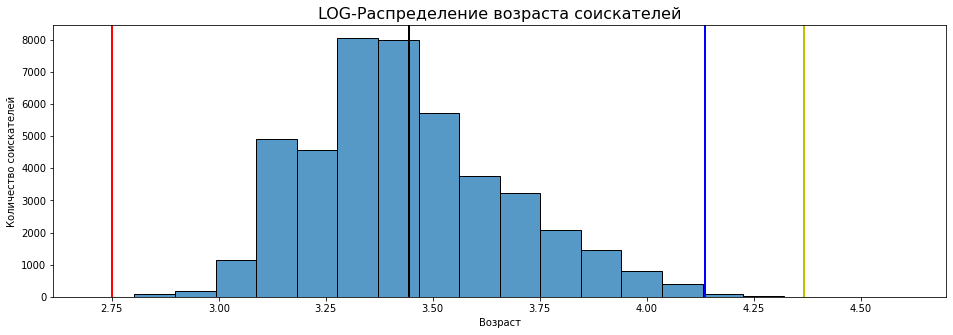

In [29]:
log_age = np.log(hh_df_clean['Возраст'])

fig = plt.subplots(figsize=(16, 5))
histplot = sns.histplot(
    data=log_age,
    bins=20,
    #ax=axes[0],
)
histplot.set_title('LOG-Распределение возраста соискателей', fontsize=16)
histplot.set_ylabel('Количество соискателей')
# находим границы интервала 3х сигм ВСТАВИТЬ ФУНКЦИЮ def()   !!!!!!
mu = log_age.mean()
sigma = log_age.std()
lower_bound = mu - 3 * sigma
upper_bound = mu + 3 * sigma
# строим дополнительные линии на графике
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(lower_bound, color='r', lw=2)
histplot.axvline(upper_bound, color='b', lw=2)

print(f'Ассиметрия -{round(log_age.skew(),2)}')

upper_bound = mu + 4 * sigma
histplot.axvline(upper_bound, color='y', lw=2);

Ассиметрия правосторонняя, т.к. А>0

In [30]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 4 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(hh_df_clean, 'Возраст', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
display(outliers)

Число выбросов по методу z-отклонения: 3


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Авто,Образование,Пол,Возраст,Опыт работы в месяцах,Город,Готовность к переезду,...,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,date,ЗП (руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,Не указано,среднее,М,15,2.0,Санкт-Петербург,False,...,False,False,False,False,True,True,True,False,2019-04-06,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,Не указано,среднее специальное,М,15,3.0,другие,False,...,False,False,False,True,False,False,False,False,2019-04-09,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,Не указано,среднее специальное,М,100,30.0,Санкт-Петербург,False,...,True,False,True,True,False,True,True,False,2019-04-19,60000.0


В выбросы попали 2 несовершеннолетних и одна запись, с явно искаженными данными - 100 лет.